In [2]:
from IPython.display import display, HTML

# Creating and displaying the large text with color and shadow
display(HTML("""
<h1 style='font-size: 50px; color: blue; text-shadow: 2px 2px 4px #000000;'>Real State Price Analysis and Prediction Model</h1>
"""))

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data =pd.read_excel("D:/zameen.xlsx")

In [4]:
df=pd.DataFrame(data)
df.head()

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date,Area Type,Area Size,Area Category
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,2019-02-04,Marla,4.0,0-5 Marla
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,2019-05-04,Marla,5.6,5-10 Marla
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,2019-07-17,Marla,8.0,5-10 Marla
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,2019-04-05,Kanal,2.0,1-5 Kanal
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,2019-07-10,Marla,8.0,5-10 Marla


In [5]:
pd.DataFrame({'count':df.shape[0],'null':df.isnull().sum(),'unique':df.nunique(),})

,count,null,unique
property_id,168446,0,168446
location_id,168446,0,4198
property_type,168446,0,7
price,168446,0,2077
location,168446,0,1509
city,168446,0,5
province_name,168446,0,3
latitude,168446,0,7838
longitude,168446,0,8316
baths,168446,0,16


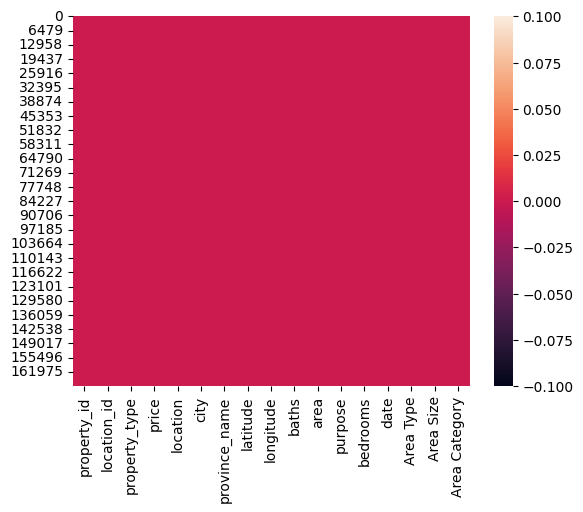

In [6]:
sns.heatmap(df.isnull())
plt.savefig('D:/heat map of null.png')
plt.show()

In [7]:
all_duplicates = df.duplicated(keep=False).all()

In [8]:
all_duplicates

False

In [9]:
df['location'].value_counts()

location
DHA Defence                   22046
Bahria Town Karachi            8548
Bahria Town Rawalpindi         8502
Bahria Town                    6429
Gulistan-e-Jauhar              5877
                              ...  
Firdous Colony                    1
Samsani Road                      1
Gulfishan Town                    1
Vital Homes Housing Scheme        1
Sundar                            1
Name: count, Length: 1509, dtype: int64

In [10]:
df['purpose'].value_counts()

purpose
For Sale    120655
For Rent     47791
Name: count, dtype: int64

In [11]:
df['city'].value_counts()

city
Karachi       60484
Lahore        41427
Islamabad     37426
Rawalpindi    20976
Faisalabad     8133
Name: count, dtype: int64

In [12]:
import pandas as pd

# Load data from Excel file


# Define conversion factors
conversion_factors = {
    "Marla": 272.25,  # Square feet per Marla
    "Kanal": 5445.0   # Square feet per Kanal
}

# Calculate Area Size in square feet
df['Area Size (sq ft)'] = df.apply(lambda row: row['Area Size'] * conversion_factors.get(row['Area Type'], 0), axis=1)

# Display the updated DataFrame
df.head()


,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date,Area Type,Area Size,Area Category,Area Size (sq ft)
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,2019-02-04,Marla,4.0,0-5 Marla,1089.0
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,2019-05-04,Marla,5.6,5-10 Marla,1524.6
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,2019-07-17,Marla,8.0,5-10 Marla,2178.0
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,2019-04-05,Kanal,2.0,1-5 Kanal,10890.0
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,2019-07-10,Marla,8.0,5-10 Marla,2178.0


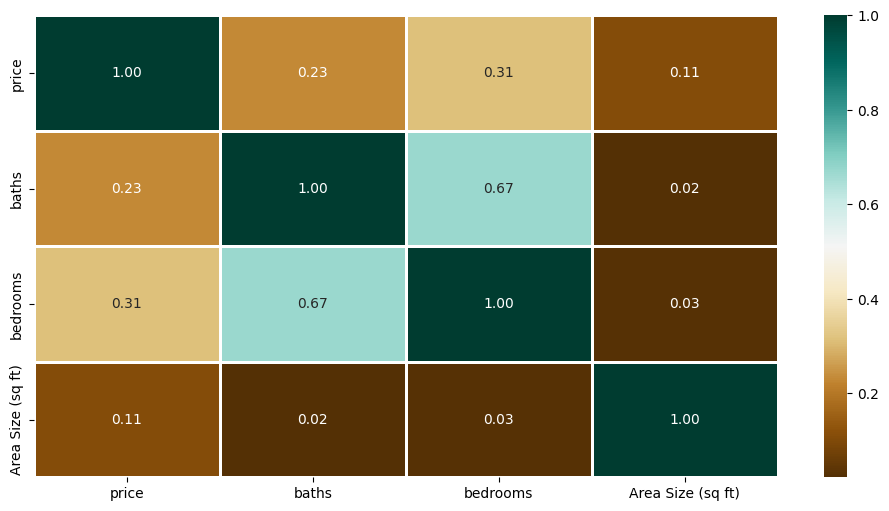

In [17]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.show()

In [13]:
#delete the columns of unessery
df.drop(columns=['property_id','location_id','province_name','date','Area Category','area','Area Type','Area Size','latitude','longitude'],inplace=True)


In [18]:
df.head(5)

,property_type,price,location,city,baths,purpose,bedrooms,Area Size (sq ft)
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,1089.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,1524.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,2178.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,10890.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,2178.0


<Axes: xlabel='price'>

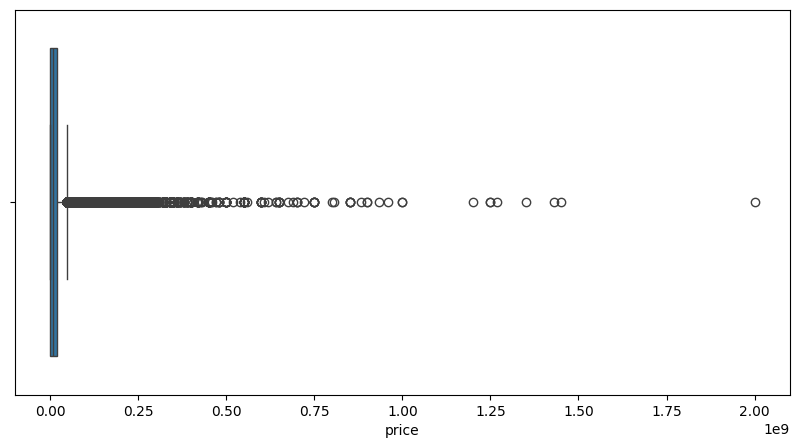

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price', data=df)


C:\Users\Abdul Majid\AppData\Local\Temp\ipykernel_18856\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

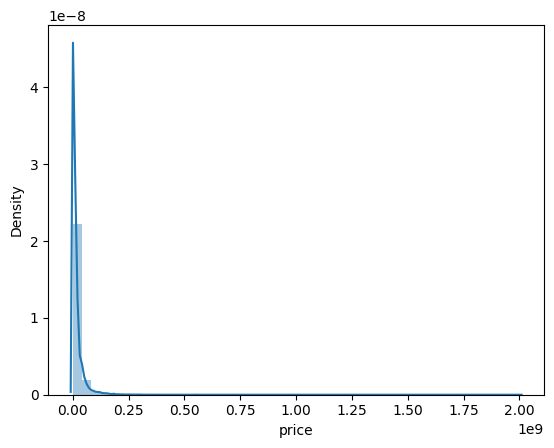

In [20]:
sns.distplot(df['price'])

In [21]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)

In [22]:
IQR=q3-q1

In [23]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)


In [29]:
min_range,max_range

(-28812500.0, 48487500.0)

In [25]:
df['price'].describe()

count    1.684460e+05
mean     1.776576e+07
std      3.531003e+07
min      0.000000e+00
25%      1.750000e+05
50%      8.500000e+06
75%      1.950000e+07
max      2.000000e+09
Name: price, dtype: float64

In [26]:
new_data=df[df['price']<=max_range]

In [27]:
new_data

,property_type,price,location,city,baths,purpose,bedrooms,Area Size (sq ft)
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,1089.00
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,1524.60
2,House,16500000,G-15,Islamabad,6,For Sale,5,2178.00
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,10890.00
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,2178.00
...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,0,For Sale,6,2613.60
168442,House,12500000,Gadap Town,Karachi,0,For Sale,3,2178.00
168443,House,27000000,Gadap Town,Karachi,0,For Sale,6,2613.60
168444,House,11000000,Gadap Town,Karachi,0,For Sale,3,2123.55


In [28]:
df.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area Size (sq ft)
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,1089.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,1524.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,2178.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,10890.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,2178.0


<Axes: xlabel='price'>

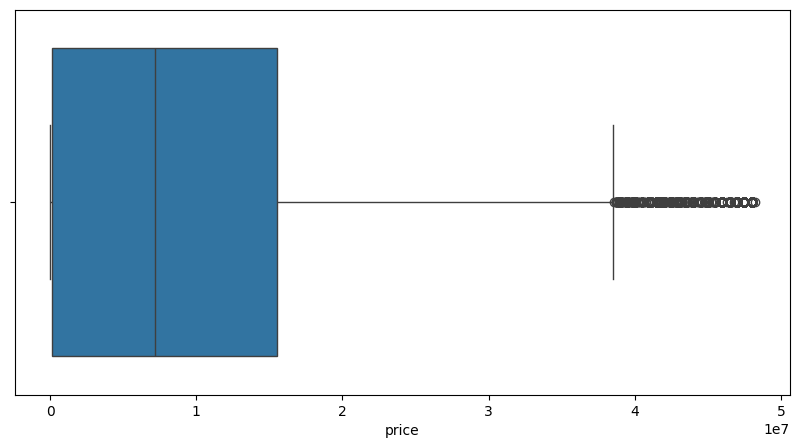

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='price',data=new_data)

In [ ]:
#Feature selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#x = df[["Area Size","property_typeN","cityN","province_nameN","Area TypeN"]]
x = df[['latitude','longitude','baths','bedrooms','Area Size','property_type_new','city_new','province_name_new','purpose_new','Areatype_new']]
y = df["price"]



In [ ]:
fs = SequentialFeatureSelector(lr, k_features=1, forward=True)
fs.fit(x, y)

In [ ]:
fs.feature_names

In [ ]:
# for 10 feature 
fs.k_score_ = 0.308

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load data
data = pd.read_excel("D:/file_ready.xlsx")
df = pd.DataFrame(data)

# Encode categorical variables
label_encoder_location = LabelEncoder()
label_encoder_property = LabelEncoder()
label_encoder_purpose = LabelEncoder()
label_encoder_city = LabelEncoder()

df['location_encoded'] = label_encoder_location.fit_transform(df['location'])
df['property_type_encoded'] = label_encoder_property.fit_transform(df['property_type'])
df['purpose_encoded'] = label_encoder_purpose.fit_transform(df['purpose'])
df['city_encoded'] = label_encoder_city.fit_transform(df['city'])

# Features and target
X = df[['location_encoded', 'baths', 'Area Size (sq ft)', 'property_type_encoded', 'purpose_encoded', 'bedrooms', 'city_encoded']]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")